# PRISM products in VirES - visualization of subauroral boundaries

This notebook demonstrates of the subaroral boundaries from the `MITx_LP_2F` Swarm products retrieved by means of the vires client with log*N*e and *T*e coloring. 


In [1]:
from viresclient import SwarmRequest

SERVER_URL = "https://vires.services/ows"


In [2]:
# data retrieval

SPACECRAFT = 'A'
START_TIME = "2015-12-15T00:00:00Z"
END_TIME = "2016-01-15T00:00:00Z"
MIT_LP_TE_PEAK = 0x6

def _insert(list_, value):
    if value not in list_:
        list_.apped(value)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MOD{SPACECRAFT}_SC_1B")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'Kp'],
    sampling_step="PT10S"
)
data_track = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()
print(data_track)
        
request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_EFI{SPACECRAFT}_LP_1B")
request.set_products(
    measurements=['Ne', 'Te'],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
    #sampling_step="PT5S"
)
data_efi = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()
print(data_efi)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
)
data_ne_min = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_ne_min)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F:ID")
request.set_products(
    measurements=['PointType'],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
)
request.set_range_filter('PointType', MIT_LP_TE_PEAK, MIT_LP_TE_PEAK)
data_te_peak = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_te_peak)
assert (data_te_peak['PointType'].values == MIT_LP_TE_PEAK).all()

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (13.137MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 267840)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-15 ... 2016-01-14T23:59:50
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Longitude   (Timestamp) float64 -69.62 -69.59 -69.55 ... -112.0 -112.0
    Radius      (Timestamp) float64 6.82e+06 6.819e+06 ... 6.82e+06 6.82e+06
    QDLat       (Timestamp) float64 57.84 58.46 59.09 59.71 ... 49.52 50.16 50.8
    Kp          (Timestamp) float64 5.3 4.7 4.7 4.7 4.7 ... 2.7 2.7 2.7 2.7 2.7
    Latitude    (Timestamp) float64 49.58 50.22 50.86 51.5 ... 42.29 42.93 43.57
Attributes:
    Sources:         ['SW_OPER_AUX_KP__2__19980101T013000_20220410T193000_000...
    MagneticModels:  []
    RangeFilters:    []


          |  [ Elapsed: 00:00, Remaining: ?]  

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/2] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (250.541MB)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [2/2] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (60.133MB)

<xarray.Dataset>
Dimensions:           (Timestamp: 5356056)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-12-15T00:00:00.19699993...
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDOrbitDirection  (Timestamp) int8 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    Longitude         (Timestamp) float64 -69.61 -69.61 -69.61 ... -112.0 -112.0
    Radius            (Timestamp) float64 6.82e+06 6.82e+06 ... 6.82e+06
    QDLat             (Timestamp) float64 57.85 57.88 57.92 ... 51.39 51.42
    Ne                (Timestamp) float64 1.67e+04 1.769e+04 ... 8.403e+04
    Te                (Timestamp) float64 3.724e+03 3.678e+03 ... 2.843e+03
    Latitude          (Timestamp) float64 49.59 49.63 49.66 ... 44.16 44.19
Attributes:
    Sources:         ['SW_OPER_EFIA_LP_1B_20151215T000000_20151215T235959_050...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.066MB)

<xarray.Dataset>
Dimensions:           (Timestamp: 711)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-12-15T00:00:00.19699993...
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDOrbitDirection  (Timestamp) int8 1 -1 1 -1 1 -1 -1 ... 1 -1 1 -1 -1 -1 -1
    Longitude         (Timestamp) float64 -69.61 98.57 -93.14 ... 102.7 79.17
    Radius            (Timestamp) float64 6.82e+06 6.819e+06 ... 6.817e+06
    QDLat             (Timestamp) float64 57.85 50.73 58.16 ... 57.24 57.85
    Latitude          (Timestamp) float64 49.59 55.0 48.64 ... 64.14 61.61 61.79
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.075MB)

<xarray.Dataset>
Dimensions:           (Timestamp: 454)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-12-15T00:19:36.19699993...
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDOrbitDirection  (Timestamp) int8 -1 1 -1 1 -1 -1 1 ... -1 1 -1 -1 -1 -1 -1
    Longitude         (Timestamp) float64 98.59 -93.15 75.04 ... 94.75 71.34
    PointType         (Timestamp) uint8 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6
    Radius            (Timestamp) float64 6.819e+06 6.82e+06 ... 6.817e+06
    QDLat             (Timestamp) float64 50.41 57.85 51.59 ... 57.7 58.59 58.44
    Latitude          (Timestamp) float64 54.68 48.32 55.47 ... 62.79 62.31
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    ['PointType:6,6']


In [3]:
# 2D data binning
from math import ceil
from numpy import stack, asarray, linspace, timedelta64
from scipy.stats import binned_statistic_2d
from viresclient._wps.time_util import parse_duration
%matplotlib inline


def _orbit_latitude(latitude, orbit_direction):
    " unwrap latitude along the orbit "
    orbit_latitude = latitude.copy()
    mask = orbit_direction == -1
    orbit_latitude[mask] = 180 - latitude[mask] 
    orbit_latitude[orbit_latitude > 180] -= 360 
    return orbit_latitude


def datetime64_to_number(precision, scale=1.0, offset=0.0):
    """ get datetime64 to number convertor. """
    def _datetime64_to_number(data):
        return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale
    return _datetime64_to_number


def number_to_datetime64(precision, scale=1.0, offset=0.0):
    """ get number to datetime64 convertor. """
    def _number_to_datetime64(data):
        return (asarray(data)/scale + offset).astype('int64').astype(f'datetime64[{precision}]')
    return _number_to_datetime64


def timedelta64_to_number(precision, scale=1.0):
    """ get datetime64 to number convertor. """
    def _datetime64_to_number(data):
        return asarray(data).astype(f'timedelta64[{precision}]').astype('int64')*scale
    return _datetime64_to_number


def number_to_timedelta64(precision, scale=1.0, offset=0.0):
    """ get number to datetime64 convertor. """
    def _number_to_timedelta64(data):
        return (asarray(data)/scale).astype('int64').astype(f'timedelta64[{precision}]')
    return _number_to_timedelta64

    
from_time = datetime64_to_number('us', 1e-6)
to_time = number_to_datetime64('us', 1e-6)
from_tdelta = timedelta64_to_number('us', 1e-6)
to_tdelta = number_to_timedelta64('us', 1e-6)


def bin_data_2d(t, l, v, tstep, lstep, statistic='max'):
    """ bin data into a 2D time vs latitude array """ 
    def _get_bins(start, end, step):
        nstep = abs(int(ceil((end - start)/step)))
        return linspace(start, end, nstep)

    tbins = _get_bins(from_time(START_TIME), from_time(END_TIME), from_tdelta(tstep))
    lbins = _get_bins(-180, 180, lstep)
    
    vb, tb, lb, _ = binned_statistic_2d(
        from_time(t), l, v,
        statistic=statistic,
        bins=(tbins, lbins),
    )
    
    return vb.transpose(), to_time(tb), lb


In [4]:
from numpy import datetime64
from matplotlib.pyplot import figure, subplot, show, colorbar
import matplotlib.cm as color_map
from matplotlib.colors import Normalize, LogNorm
%matplotlib inline

start_time, end_time = datetime64(START_TIME), datetime64(END_TIME)


def align_axes_horizontally(ax, ax_ref):
    pos_ref = ax_ref.get_position()
    pos = ax.get_position()
    ax.set_position([pos_ref.x0, pos.y0, pos_ref.width, pos.height]) 

    
def _orbit_latitude(latitude, orbit_direction):
    " unwrap latitude along the orbit "
    orbit_latitude = latitude.copy()
    mask = orbit_direction == -1
    orbit_latitude[mask] = 180 - latitude[mask] 
    orbit_latitude[orbit_latitude > 180] -= 360 
    return orbit_latitude


def _periodic_qd_plot(ax, is_north):
    if is_north:
        ylim = [30, 150]
        yticks = [30, 45, 60, 75, 90, 105, 120, 135, 150]
        ylabels = ['+30\u00B0\u2191', '+45\u00B0\u2191', '+60\u00B0\u2191', '+75\u00B0\u2191', '+90\u00B0', '+75\u00B0\u2193', '+60\u00B0\u2193', '+45\u00B0\u2193', '+30\u00B0\u2193']
    else:
        ylim = [-150, -30]
        yticks = [-150, -135, -120, -105, -90, -75, -60, -45, -30]
        ylabels = ['\u221230\u00B0\u2193', '\u221245\u00B0\u2193', '\u221260\u00B0\u2193', '\u221275\u00B0\u2193', '\u221290\u00B0', '\u221275\u00B0\u2191', '\u221260\u00B0\u2191', '\u221245\u00B0\u2191', '\u221230\u00B0\u2191']
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)


def plot_kp(ax):
    ax.fill_between(data_track['Timestamp'].values, data_track['Kp'].values, color='tab:red', alpha=0.25)
    h_kp, = ax.plot(data_track['Timestamp'].values, data_track['Kp'].values, '-', color='tab:red')
    ax.set_ylim([-0.5, 8.5])
    ax.set_ylabel("Kp index")
    ax.set_xlim(start_time, end_time)
    ax.grid()
    return ax


/tmp/ipykernel_271/1075384047.py:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time, end_time = datetime64(START_TIME), datetime64(END_TIME)


/tmp/ipykernel_271/568699905.py:20: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale


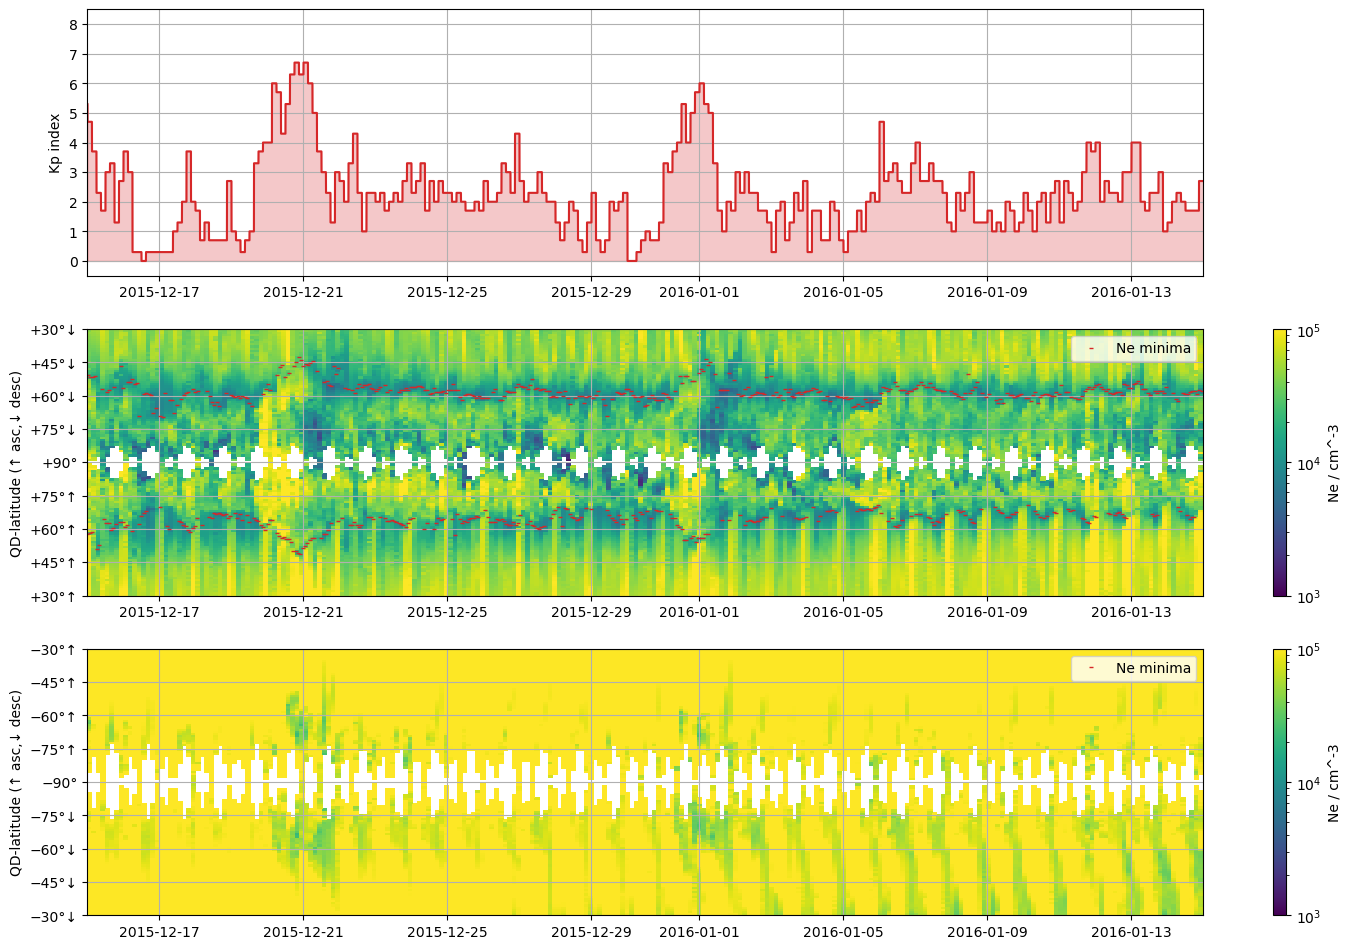

In [6]:
def plot_log_ne(ax, is_north=True):
    im = ax.pcolor(time_ne_bin, lat_qd_orb_ne_bin, values_ne_bin, norm=LogNorm(vmin=ne_min, vmax=ne_max))
    cax = colorbar(im)
    cax.set_label('Ne / cm^-3')
    h_min, = ax.plot(time_ne_min, lat_qd_ne_min, '_', c='tab:red', ms=2.5)
    ax.legend([h_min], ["Ne minima"])
    ax.grid()
    ax.set_ylabel('QD-latitude (\u2191 asc,\u2193 desc)')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax

# data preparation
time_ne_min = data_ne_min['Timestamp'].values
lat_qd_ne_min = _orbit_latitude(
    data_ne_min['QDLat'],
    data_ne_min['QDOrbitDirection'],
)

time_ne = data_efi['Timestamp'].values
lat_qd_orb_ne = _orbit_latitude(
    data_efi['QDLat'],
    data_efi['QDOrbitDirection'],
)
values_ne = data_efi['Ne'].values

# data binning
values_ne_bin, time_ne_bin, lat_qd_orb_ne_bin = bin_data_2d(
    time_ne,
    lat_qd_orb_ne,
    values_ne,
    tstep=parse_duration('P3H'),
    lstep=1, # deg
    statistic='median',
)

# plotting
ne_min, ne_max = 1e3, 1e5

fig = figure(figsize=(18, 12), dpi=100)

ax_kp = plot_kp(subplot(311))
ax_ne_n = plot_log_ne(subplot(312), is_north=True)
ax_ne_s = plot_log_ne(subplot(313), is_north=False)


align_axes_horizontally(ax_ne_s, ax_ne_n)
align_axes_horizontally(ax_kp, ax_ne_n)

/tmp/ipykernel_271/568699905.py:20: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale


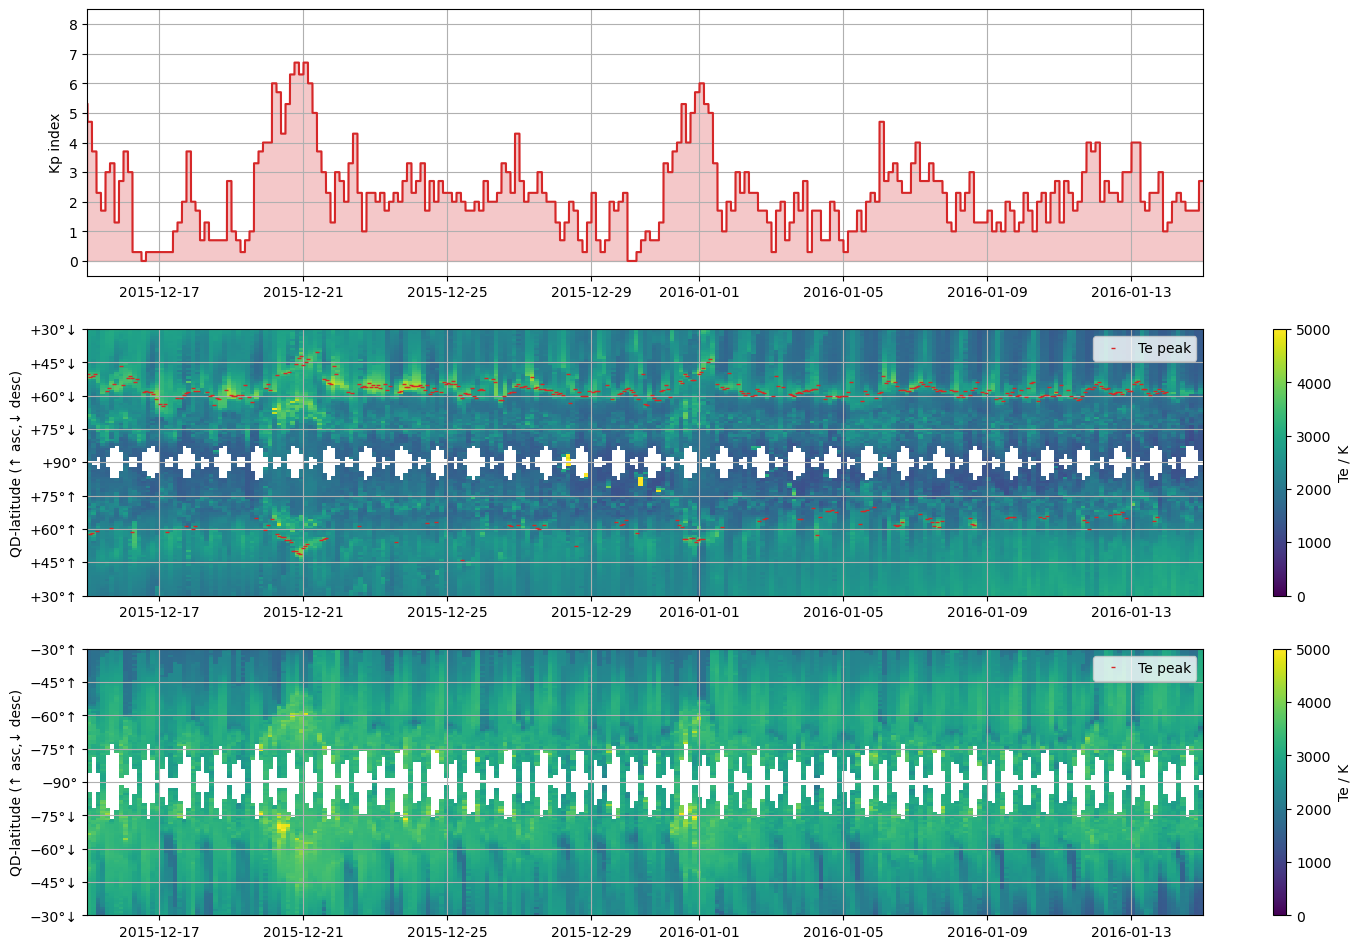

In [7]:
def plot_te(ax, is_north=True):
    im = ax.pcolor(time_te_bin, lat_qd_orb_te_bin, values_te_bin, norm=Normalize(vmin=te_min, vmax=te_max))
    cax = colorbar(im)
    cax.set_label('Te / K')
    h_peak, = ax.plot(time_te_peak, lat_qd_te_peak, '_', c='tab:red', ms=2.5)    
    ax.legend([h_peak], ["Te peak"])
    ax.grid()
    ax.set_ylabel('QD-latitude (\u2191 asc,\u2193 desc)')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax

# data preparation
time_te_peak = data_te_peak['Timestamp'].values
lat_qd_te_peak = _orbit_latitude(
    data_te_peak['QDLat'],
    data_te_peak['QDOrbitDirection'],
)

time_te = data_efi['Timestamp'].values
lat_qd_orb_te = _orbit_latitude(
    data_efi['QDLat'],
    data_efi['QDOrbitDirection'],
)
values_te = data_efi['Te'].values

# data binning
values_te_bin, time_te_bin, lat_qd_orb_te_bin = bin_data_2d(
    time_ne,
    lat_qd_orb_ne,
    values_te,
    tstep=parse_duration('P3H'),
    lstep=1, # deg
    statistic='median',
)

# plotting
te_min, te_max = 0, 5e3

fig = figure(figsize=(18, 12), dpi=100)

ax_kp = plot_kp(subplot(311))
ax_te_n = plot_te(subplot(312), is_north=True)
ax_te_s = plot_te(subplot(313), is_north=False)

align_axes_horizontally(ax_te_s, ax_te_n)
align_axes_horizontally(ax_kp, ax_te_n)